In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

In [2]:
from torchvision import datasets
train_tfm = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_tfm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=train_tfm
)
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=test_tfm
)

device = "cuda" if torch.cuda.is_available() else "cpu"

100%|██████████| 170498071/170498071 [00:13<00:00, 12250417.26it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
len(train_data), len(test_data)

(50000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          ...,
          [-2.4291,  1.4867,  1.1959,  ...,  0.8858,  1.7387,  1.1765],
          [-2.4291,  1.7581,  1.3122,  ...,  1.5061,  1.5642, -0.0253],
          [-2.4291,  1.8356,  1.4673,  ...,  1.1765,  0.9245, -1.3435]],
 
         [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          ...,
          [-2.4183,  0.6694,  0.1188,  ...,  0.1581,  1.1808,  0.6301],
          [-2.4183,  1.0038,  0.2564,  ...,  0.8661,  0.9841, -0.5892],
          [-2.4183,  1.1611,  0.5318,  ...,  0.6301,  0.4138, -1.8479]],
 
         [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
          [-2.2214, -2.2214,

In [5]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
classToIdx = train_data.class_to_idx
classToIdx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [7]:
image.shape, label

(torch.Size([3, 32, 32]), 6)

In [8]:
train_data.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


torch.Size([3, 32, 32])


(-0.5, 31.5, 31.5, -0.5)

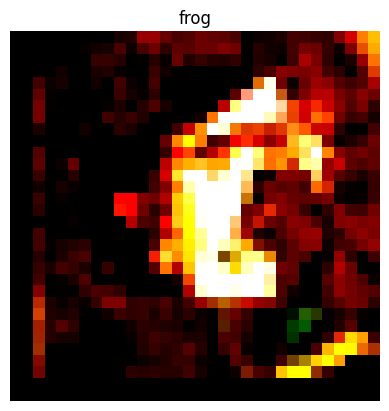

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.permute(2, 1, 0))
# plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

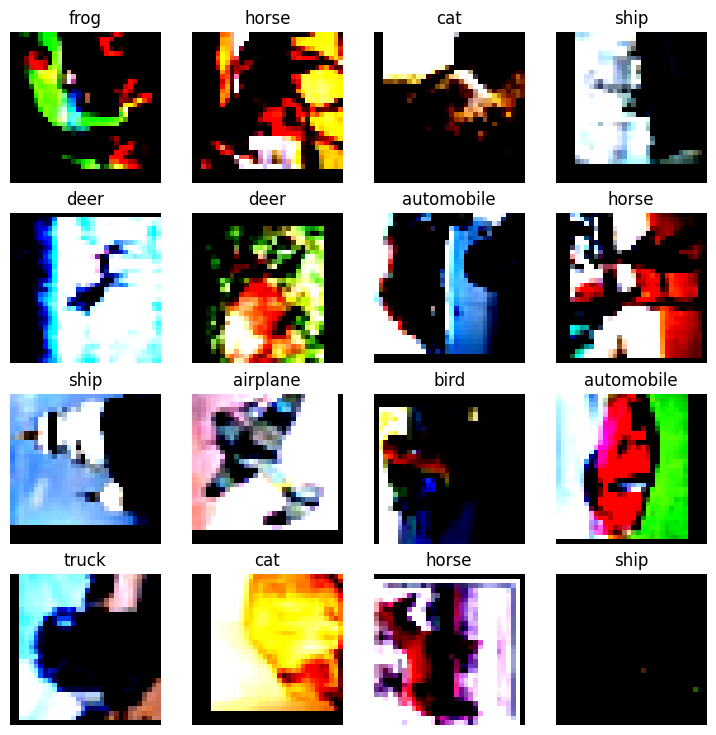

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, lbl = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(2, 1, 0))
    plt.title(class_names[lbl])
    plt.axis(False)

In [11]:
from torch.utils.data import DataLoader

Batch_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=128, shuffle=True, num_workers=2)
test_dataloader = DataLoader(dataset=test_data, batch_size=100, shuffle=False, num_workers=2)

In [12]:
train_dataloader, test_dataloader, len(train_dataloader), len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7a0e2b67d8a0>,
 391,
 100)

In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

image size: torch.Size([3, 32, 32])
label: 1, label size: torch.Size([])


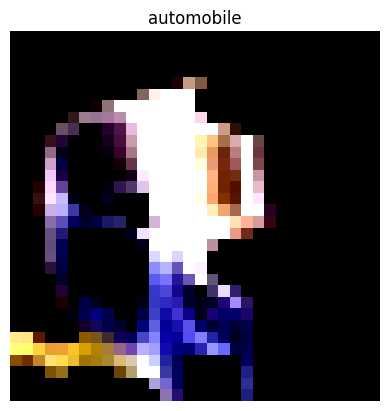

In [14]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, lbl = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(2, 1, 0))
plt.title(class_names[lbl])
plt.axis("off")
print(f"image size: {img.shape}")
print(f"label: {lbl}, label size: {lbl.shape}")

In [15]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, mid_channels, downsample=None, stride=1):
        super().__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(in_channels=in_channels,
                    out_channels=mid_channels,
                    kernel_size=(1, 1),
                    stride=1,
                    padding=0,
                    bias=False)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        self.conv2 = nn.Conv2d(in_channels=mid_channels,
                    out_channels=mid_channels,
                    kernel_size=(3, 3),
                    stride=stride,
                    padding=1,
                    bias=False)
        self.bn2 = nn.BatchNorm2d(mid_channels)
        self.conv3 = nn.Conv2d(in_channels=mid_channels,
                    out_channels=mid_channels*self.expansion,
                    kernel_size=(1, 1),
                    stride=1,
                    padding=0,
                    bias=False)
        self.bn3 = nn.BatchNorm2d(mid_channels*self.expansion)
        self.relu = nn.ReLU()
        self.stride = stride
        self.downsample = downsample

    def forward(self, x):
        residual = x.clone()

        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x))

        if self.downsample is not None:
            residual = self.downsample(residual)
        x += residual
        x = self.relu(x)

        return x


class ResNet(nn.Module):
    def __init__(self, block, layers, input_channels, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv = nn.Conv2d(in_channels=input_channels,
                            out_channels=64,
                            kernel_size=(7, 7),
                            stride=2,
                            padding=3,
                            bias=False)
        self.bn = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=(3, 3), stride=2, padding=1)

        self.layer1 = self._make_layer(block, layers[0], mid_channels=64, stride=1)
        self.layer2 = self._make_layer(block, layers[1], mid_channels=128, stride=2)
        self.layer3 = self._make_layer(block, layers[2], mid_channels=256, stride=2)
        self.layer4 = self._make_layer(block, layers[3], mid_channels=512, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512*4, num_classes)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn(self.conv(x))))

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, blocks_num, mid_channels, stride):
        downsample = None
        layers = []
        if stride != 1 or self.in_channels != mid_channels*4:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels=self.in_channels,
                            out_channels=mid_channels*4,
                            kernel_size=(1, 1),
                            stride=stride,
                            bias=False),
                nn.BatchNorm2d(mid_channels*4)
            )
        layers.append(block(in_channels=self.in_channels,
                            mid_channels=mid_channels,
                            downsample=downsample,
                            stride=stride))
        self.in_channels = mid_channels*4

        for i in range(blocks_num-1):
            layers.append(block(in_channels=self.in_channels, mid_channels=mid_channels))

        return nn.Sequential(*layers)

model_0 = ResNet(ResidualBlock, [3, 4, 6, 3], 3, 10).to(device)


In [16]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
    total_time = end - start
    print(f"Train time on {device}: {total_time}")

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [18]:
epochs = 200
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [19]:
from tqdm.auto import tqdm

train_losses = []
test_losses = []
test_accs = []

train_time_start = timer()

torch.manual_seed(42)
torch.cuda.manual_seed(42)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        model_0.train()
        # Forward pass
        y_pred = model_0(X)
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.cpu().detach().numpy()
        # Optimizer xero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    scheduler.step()

    train_loss /= len(train_dataloader)
    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            # Forward pass
            test_pred = model_0(X_test)
            # Calculate loss
            t_loss = loss_fn(test_pred, y_test)
            test_loss += t_loss.cpu().detach().numpy()
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        # Calculate test loss avarage per batch
        test_loss /= len(test_dataloader)
        # Calculate test acc average per batch
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f},  Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

# Calculate training time
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                                end=train_time_end,
                                                device=str(next(model_0.parameters()).device))

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0 
 
Looked at 0/50000 samples

Train loss: 2.6952,  Test loss: 2.8555, Test acc: 17.8600
Epoch: 1 
 
Looked at 0/50000 samples

Train loss: 2.3028,  Test loss: 4.3826, Test acc: 35.8500
Epoch: 2 
 
Looked at 0/50000 samples

Train loss: 2.3666,  Test loss: 2.1411, Test acc: 25.9200
Epoch: 3 
 
Looked at 0/50000 samples

Train loss: 2.2906,  Test loss: 2.0567, Test acc: 31.9600
Epoch: 4 
 
Looked at 0/50000 samples

Train loss: 2.0564,  Test loss: 2.0163, Test acc: 35.2700
Epoch: 5 
 
Looked at 0/50000 samples

Train loss: 1.8887,  Test loss: 1.9886, Test acc: 40.9000
Epoch: 6 
 
Looked at 0/50000 samples

Train loss: 1.8047,  Test loss: 2.2298, Test acc: 39.8300
Epoch: 7 
 
Looked at 0/50000 samples

Train loss: 1.9593,  Test loss: 4.2639, Test acc: 33.8500
Epoch: 8 
 
Looked at 0/50000 samples

Train loss: 1.8288,  Test loss: 2.5521, Test acc: 42.4000
Epoch: 9 
 
Looked at 0/50000 samples

Train loss: 1.7535,  Test loss: 2.7686, Test acc: 43.0700
Epoch: 10 
 
Looked at 0/50000

In [20]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    return {"model_loss": loss, "model_acc": acc}


In [21]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss}, Train accuracy: {train_acc}")


def test_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device=device):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            teste_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

In [22]:
torch.save(model_0.state_dict(), "CIFAR10_model.pth")

Text(0.5, 1.0, 'Train Loss')

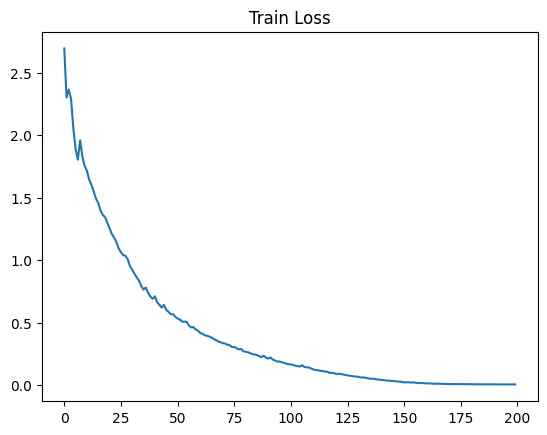

In [23]:
num_epoch = [x for x in range(epochs)]
plt.plot(num_epoch, train_losses)
plt.title("Train Loss")

Text(0.5, 1.0, 'Test Loss')

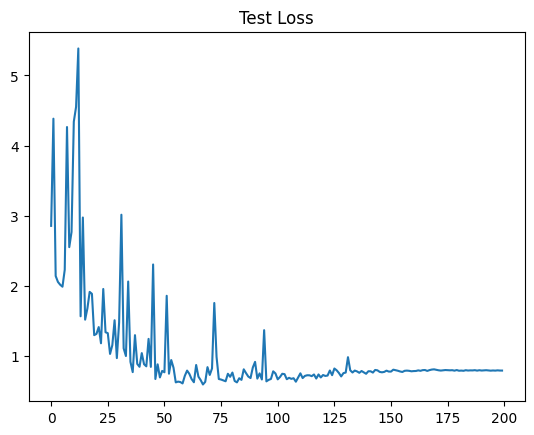

In [24]:
plt.plot(num_epoch, test_losses)
plt.title("Test Loss")

Text(0.5, 1.0, 'Test Accuracy')

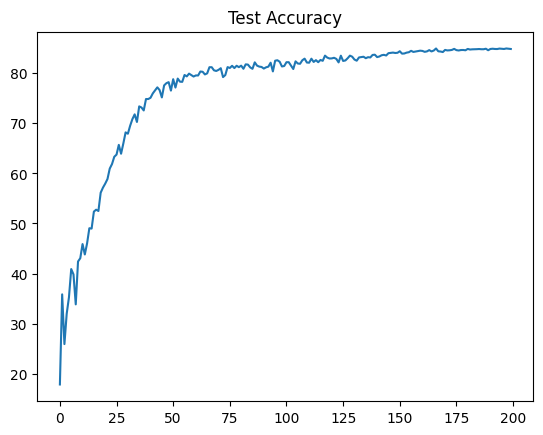

In [25]:
plt.plot(num_epoch, test_accs)
plt.title("Test Accuracy")